In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
# 24 minutes for half
total_seconds = 24 * 60
# score every 30 seconds
attempts = total_seconds / 30
two_point_attempts = np.arange(0,attempts + 1, 1)
three_point_attempts = attempts - two_point_attempts

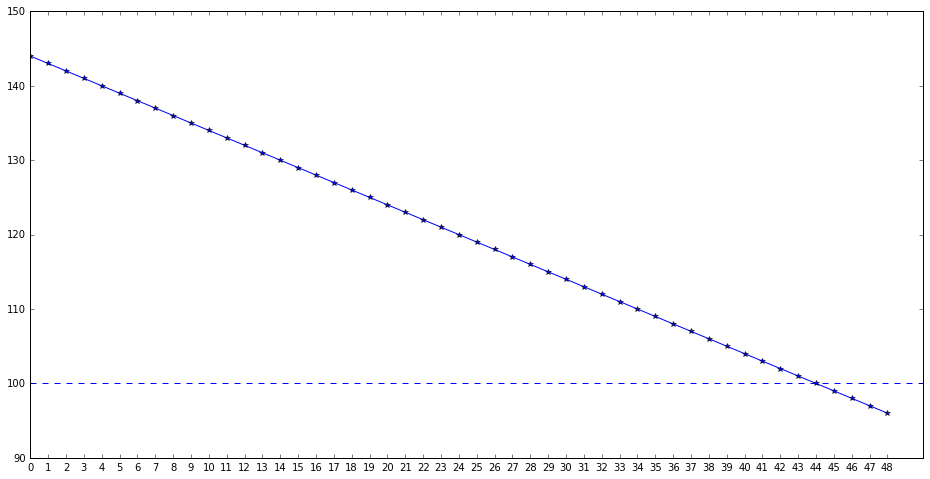

In [19]:
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(two_point_attempts,two_point_attempts * 2 + three_point_attempts * 3,'-*')
ax.axhline(100,linestyle = '--')
_=ax.set(xticks=two_point_attempts)

In [37]:
def hundred_points(interval=30):
    total_seconds = 24 * 60
    attempts = total_seconds / interval
    two_point_attempts = np.arange(0,attempts + 1, 1)
    three_point_attempts = attempts - two_point_attempts
    fig,ax = plt.subplots(figsize=(16,8))
    scores = two_point_attempts * 2 + three_point_attempts * 3
    ax.plot(two_point_attempts,scores,'-*')
    ax.axhline(100,linestyle = '--')
    _=ax.set(xticks=two_point_attempts,xlabel='two-point attempts',ylabel='Total score if make all shots')

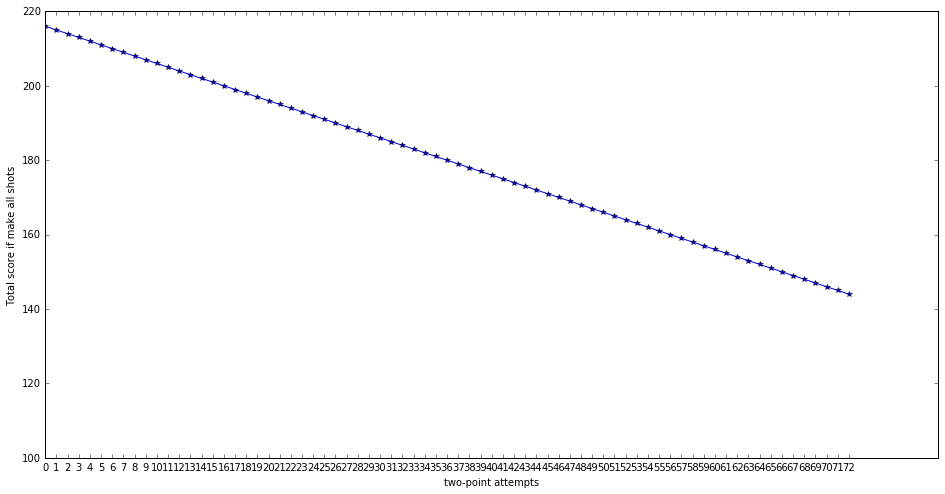

In [38]:
hundred_points(20)

In [44]:
def line_intersection(line1, line2):
    xdiff = (line1[0][0] - line1[1][0], line2[0][0] - line2[1][0])
    ydiff = (line1[0][1] - line1[1][1], line2[0][1] - line2[1][1]) #Typo was here

    def det(a, b):
        return a[0] * b[1] - a[1] * b[0]

    div = det(xdiff, ydiff)
    if div == 0:
       raise Exception('lines do not intersect')

    d = (det(*line1), det(*line2))
    x = det(d, xdiff) / div
    y = det(d, ydiff) / div
    if (x > line1[1][0]) or (x < 0):
        return None
    else:
        return x, y


In [57]:
lines = [];intersections=[]
import math
for ii,interval in enumerate(np.arange(20,60,1)):
    total_seconds = 24 * 60
    attempts = math.ceil(total_seconds / interval)
    two_point_attempts = np.arange(0,attempts + 1, 1)
    three_point_attempts = attempts - two_point_attempts
    scores = two_point_attempts * 2 + three_point_attempts * 3
    lines.append([[(0,100),(two_point_attempts[-1],100)],[(two_point_attempts[0],scores[0]),(two_point_attempts[-1],scores[-1])]]
                )
    l1, l2 = lines[ii]
    intersections.append([interval,attempts,line_intersection(l1,l2)])

In [62]:
intersect=[]
for item in intersections:
    if item[-1] is None:
        pass
    else:
        intersect.append([item[0],item[1],item[-1][0]])

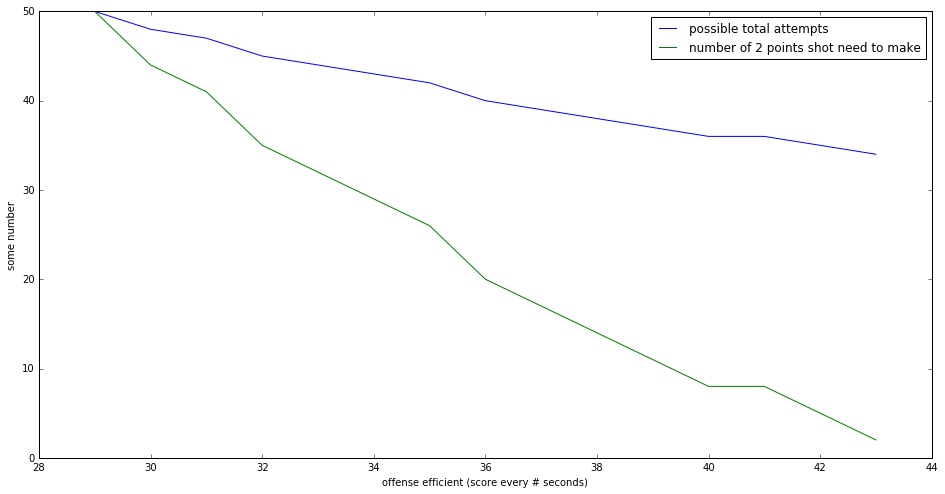

In [67]:
intersect = np.array(intersect)
fig,ax = plt.subplots(figsize=(16,8))
ax.plot(intersect[:,0],intersect[:,1],label='possible total attempts')
ax.plot(intersect[:,0],intersect[:,2],label='number of 2 points shot need to make')
ax.legend()
_=ax.set(xlabel='offense efficient (score every # seconds)',ylabel='some number')